# 1 Подготовка данных и предварительный анализ

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('data/csgo_games.csv')
df.shape

(3787, 170)

In [6]:
df.head()

match_date       team_1       team_2  t1_points  t2_points  t1_world_rank  \
0  2016-12-18       CLOUD9  HELLRAISERS         13         16              9   
1  2016-12-18    IMMORTALS           G2         17         19             13   
2  2016-12-18  MOUSESPORTS    IMMORTALS         16          3             12   
3  2016-12-18     DIGNITAS           G2         16          9              6   
4  2016-12-18        OPTIC  HELLRAISERS         16         10              4   

   t2_world_rank  t1_h2h_win_perc  t2_h2h_win_perc winner  ...  \
0             20         0.500000         0.500000     t2  ...   
1             10         0.500000         0.500000     t2  ...   
2             13         0.500000         0.500000     t1  ...   
3             10         0.416667         0.583333     t1  ...   
4             20         0.500000         0.500000     t1  ...   

   t2_player5_dpr  t2_player5_spr  t2_player5_opk_ratio  \
0            0.63            0.10                  1.05   
1            0.69            0.09                  0.85   
2            0.67            0.07                  0.79   
3            0.69            0.09                  0.85   
4            0.63            0.10                  1.05   

   t2_player5_opk_rating  t2_player5_wins_perc_after_fk  \
0                   0.92                          0.733   
1                   0.96                          0.739   
2                   0.94                          0.723   
3                   0.96                          0.739   
4                   0.92                          0.733   

   t2_player5_fk_perc_in_wins  t2_player5_multikill_perc  \
0                       0.104                   0.147018   
1                       0.147                   0.135810   
2                       0.129                   0.148257   
3                       0.147                   0.135810   
4                       0.104                   0.147018   

   t2_player5_rating_at_least_one_perc  t2_player5_is_sniper  \
0                                0.528                 False   
1                                0.438                  True   
2                                0.526                 False   
3                                0.438                  True   
4                                0.528                 False   

   t2_player5_clutch_win_perc  
0                    0.666667  
1                    0.406250  
2                    0.733333  
3                    0.406250  
4                    0.666667  

[5 rows x 170 columns]

## Описание

| Столбец              | Описание                                                                 |
|-----------------------|--------------------------------------------------------------------------|
| `match_date`          | Дата проведения матча                                                   |
| `team_1`, `team_2`    | Названия команд-участниц                                                |
| `t1_points`, `t2_points` | Количество очков/раундов, набранных каждой командой                    |
| `t1_world_rank`, `t2_world_rank` | Мировой рейтинг команд на момент матча (число)                |
| `t1_h2h_win_perc`, `t2_h2h_win_perc` | Процент побед в предыдущих встречах между этими командами (Head-to-Head) |
| `winner`              | Победитель матча (`t1` или `t2`)                                          |
| `tY_playerX_rating`     | Общий рейтинг игрока (аналогично HLTV 2.0)                              |
| `tY_playerX_impact`     | Влияние игрока на раунды (учитывает мультикиллы, открытия и т.д.)       |
| `tY_playerX_kdr`        | Соотношение убийств к смертям (Kill/Death Ratio)                        |
| `tY_playerX_dmr`        | Средний урон за раунд (Damage per Round)                                |
| `tY_playerX_kpr`        | Количество убийств за раунд (Kills per Round)                           |
| `tY_playerX_apr`        | Количество ассистов за раунд (Assists per Round)                        |
| `tY_playerX_dpr`        | Количество смертей за раунд (Deaths per Round)                          |
| `tY_playerX_spr`        | Количество спасений за раунд (Saves per Round)                          |
| `tY_playerX_opk_ratio`  | Эффективность в открытиях раундов (Opening Kill Ratio)                  |
| `tY_playerX_opk_rating` | Рейтинг открытий (на основе успешности OPK)                             |
| `tY_playerX_wins_perc_after_fk` | Процент выигранных раундов после первого убийства (FK)           |
| `tY_playerX_fk_perc_in_wins` | Процент первых убийств в выигранных раундах                         |
| `tY_playerX_multikill_perc` | Процент раундов с 2+ убийствами (Multikills)                         |
| `tY_playerX_rating_at_least_one_perc` | Процент раундов с рейтингом ≥ 1.0                          |
| `tY_playerX_is_sniper`  | Является ли игрок снайпером (`1`/`0`)                                   |
| `tY_playerX_clutch_win_perc` | Процент выигранных клатч-ситуаций (1vsX)                            |

**Заполняем пропуски**

In [7]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

t1_player5_wins_perc_after_fk    2
t2_player3_wins_perc_after_fk    1
t2_player5_wins_perc_after_fk    1
dtype: int64

In [8]:
df[[
    't1_player5_wins_perc_after_fk', 
    't2_player3_wins_perc_after_fk', 
    't2_player5_wins_perc_after_fk'
]].head()

t1_player5_wins_perc_after_fk  t2_player3_wins_perc_after_fk  \
0                          0.818                          0.737   
1                          0.723                          0.716   
2                          0.747                          0.799   
3                          0.778                          0.716   
4                          0.736                          0.737   

   t2_player5_wins_perc_after_fk  
0                          0.733  
1                          0.739  
2                          0.723  
3                          0.739  
4                          0.733

In [9]:
for col in [
    't1_player5_wins_perc_after_fk', 
    't2_player3_wins_perc_after_fk', 
    't2_player5_wins_perc_after_fk'
]:
    df[col] = df[col].fillna(df[col].median())

**Дубликаты**

In [10]:
df[df.duplicated()]  # Дубликатов нет

Empty DataFrame
Columns: [match_date, team_1, team_2, t1_points, t2_points, t1_world_rank, t2_world_rank, t1_h2h_win_perc, t2_h2h_win_perc, winner, t1_player1_rating, t1_player1_impact, t1_player1_kdr, t1_player1_dmr, t1_player1_kpr, t1_player1_apr, t1_player1_dpr, t1_player1_spr, t1_player1_opk_ratio, t1_player1_opk_rating, t1_player1_wins_perc_after_fk, t1_player1_fk_perc_in_wins, t1_player1_multikill_perc, t1_player1_rating_at_least_one_perc, t1_player1_is_sniper, t1_player1_clutch_win_perc, t1_player2_rating, t1_player2_impact, t1_player2_kdr, t1_player2_dmr, t1_player2_kpr, t1_player2_apr, t1_player2_dpr, t1_player2_spr, t1_player2_opk_ratio, t1_player2_opk_rating, t1_player2_wins_perc_after_fk, t1_player2_fk_perc_in_wins, t1_player2_multikill_perc, t1_player2_rating_at_least_one_perc, t1_player2_is_sniper, t1_player2_clutch_win_perc, t1_player3_rating, t1_player3_impact, t1_player3_kdr, t1_player3_dmr, t1_player3_kpr, t1_player3_apr, t1_player3_dpr, t1_player3_spr, t1_player3_opk_ratio, t1_player3_opk_rating, t1_player3_wins_perc_after_fk, t1_player3_fk_perc_in_wins, t1_player3_multikill_perc, t1_player3_rating_at_least_one_perc, t1_player3_is_sniper, t1_player3_clutch_win_perc, t1_player4_rating, t1_player4_impact, t1_player4_kdr, t1_player4_dmr, t1_player4_kpr, t1_player4_apr, t1_player4_dpr, t1_player4_spr, t1_player4_opk_ratio, t1_player4_opk_rating, t1_player4_wins_perc_after_fk, t1_player4_fk_perc_in_wins, t1_player4_multikill_perc, t1_player4_rating_at_least_one_perc, t1_player4_is_sniper, t1_player4_clutch_win_perc, t1_player5_rating, t1_player5_impact, t1_player5_kdr, t1_player5_dmr, t1_player5_kpr, t1_player5_apr, t1_player5_dpr, t1_player5_spr, t1_player5_opk_ratio, t1_player5_opk_rating, t1_player5_wins_perc_after_fk, t1_player5_fk_perc_in_wins, t1_player5_multikill_perc, t1_player5_rating_at_least_one_perc, t1_player5_is_sniper, t1_player5_clutch_win_perc, t2_player1_rating, t2_player1_impact, t2_player1_kdr, t2_player1_dmr, t2_player1_kpr, t2_player1_apr, t2_player1_dpr, t2_player1_spr, t2_player1_opk_ratio, t2_player1_opk_rating, ...]
Index: []

[0 rows x 170 columns]

**Категориальные в числовые**

In [11]:
numeric_columns = df.select_dtypes(exclude=['int64', 'float64', 'number', 'bool']).columns
numeric_columns

Index(['match_date', 'team_1', 'team_2', 'winner'], dtype='object')

In [12]:
label_columns = ['winner']
onehot_columns = ['team_1', 'team_2']

In [13]:
from sklearn.preprocessing import LabelEncoder

for col in label_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [14]:
team_onehot = pd.get_dummies(df[onehot_columns], prefix=onehot_columns)
df = pd.concat([df.drop(onehot_columns, axis=1), team_onehot], axis=1)

**Обработка дат**

In [15]:
df['match_date'] = pd.to_datetime(df['match_date'])

df['match_year'] = df['match_date'].dt.year
df['match_month'] = df['match_date'].dt.month
df['match_day'] = df['match_date'].dt.day
df['match_dayofweek'] = df['match_date'].dt.dayofweek

df.drop('match_date', axis=1, inplace=True)

**EDA**

170 признаков...

In [16]:
numeric_cols = df.select_dtypes(exclude=['bool']).columns

n_cols = 2
n_rows = len(numeric_cols) // n_cols + 1
plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 2 * n_cols, 2 * i - 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'хиста {col}')

    plt.subplot(n_rows, 2 * n_cols, 2 * i)
    sns.boxplot(x=df[col])
    plt.title(f'ящик с усиками {col}')

plt.tight_layout()
plt.show()

Численные данные, в основном, распределены нормально.

Выбросы присутствуют.

Оставим их и будем пытаться учитывать.

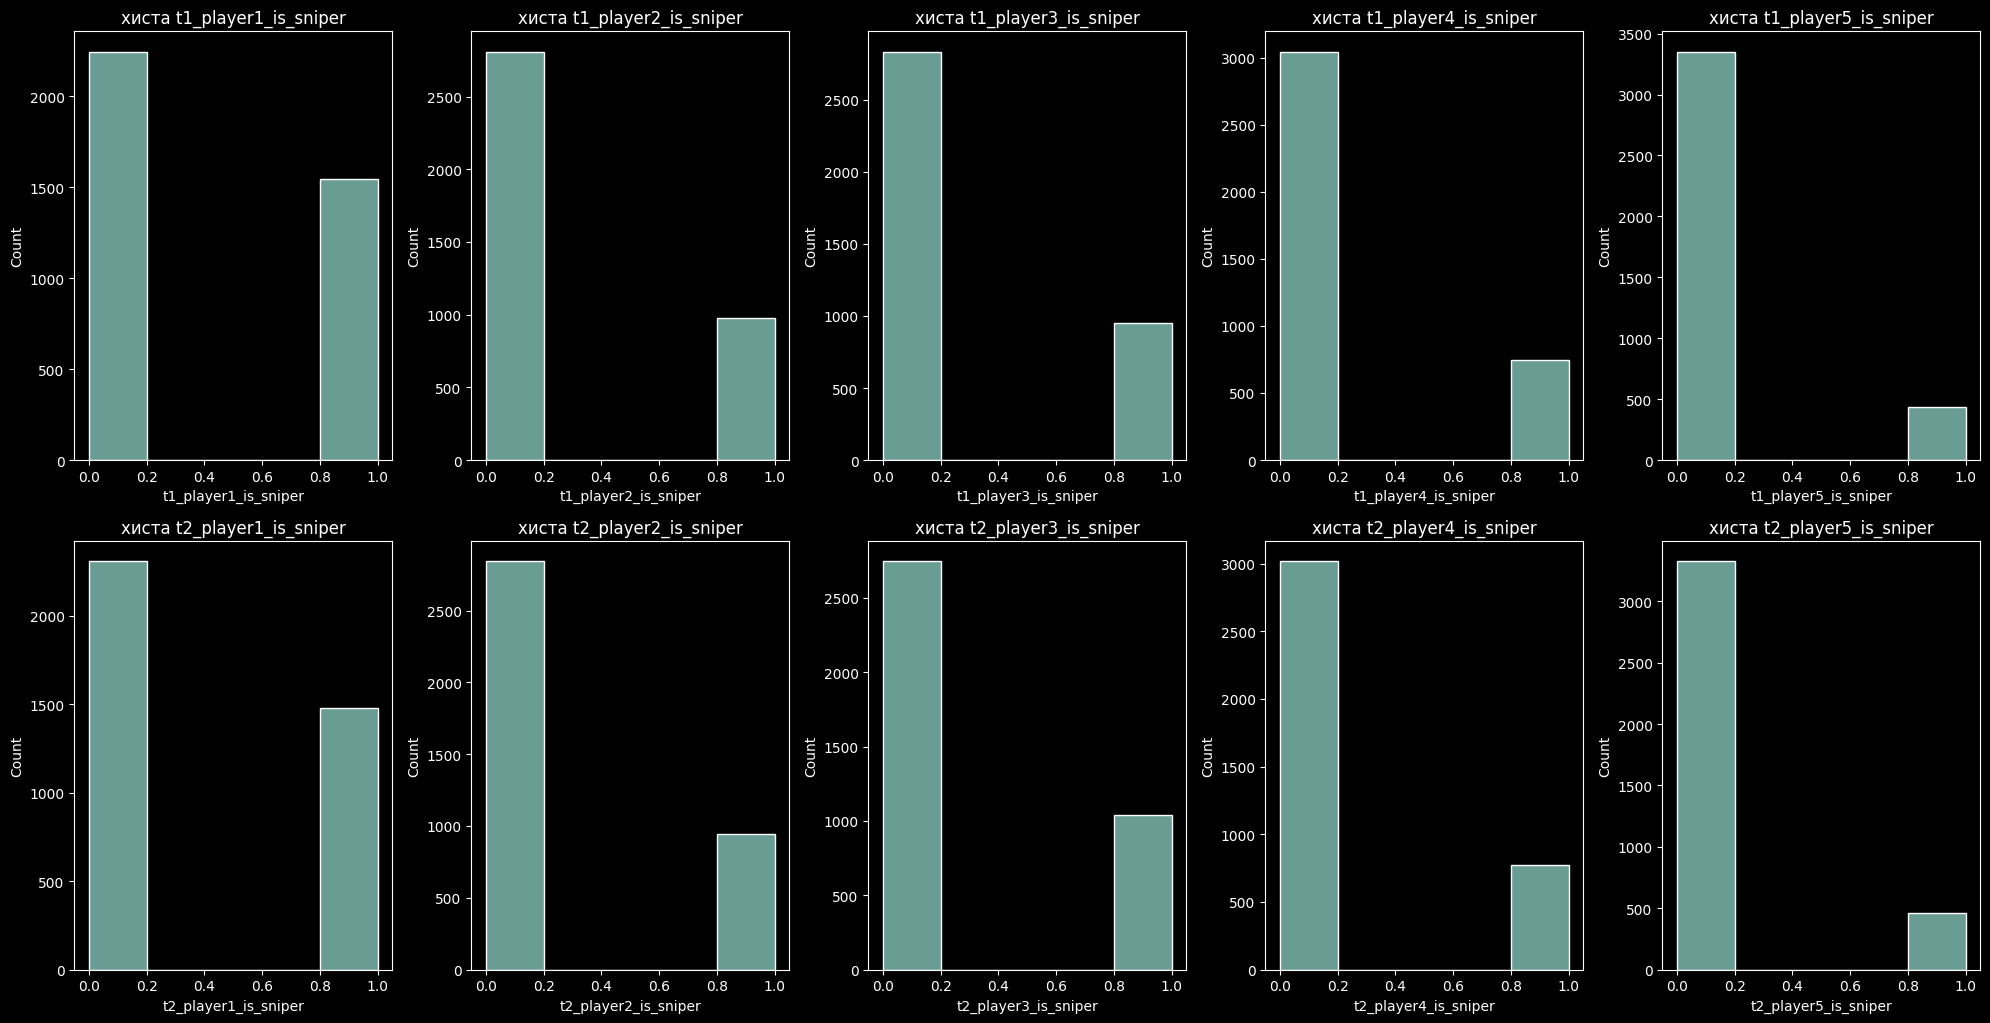

In [18]:
numeric_cols = [f't{i}_player{j}_is_sniper' for i in range(1, 3) for j in range(1, 6)]

n_cols = 5
n_rows = len(numeric_cols) // n_cols + 1
plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=5)
    plt.title(f'хиста {col}')

plt.tight_layout()
plt.show()

Не знаю, что хотел увидеть у распределения бинарных признаков

**Матрица коррелиций**

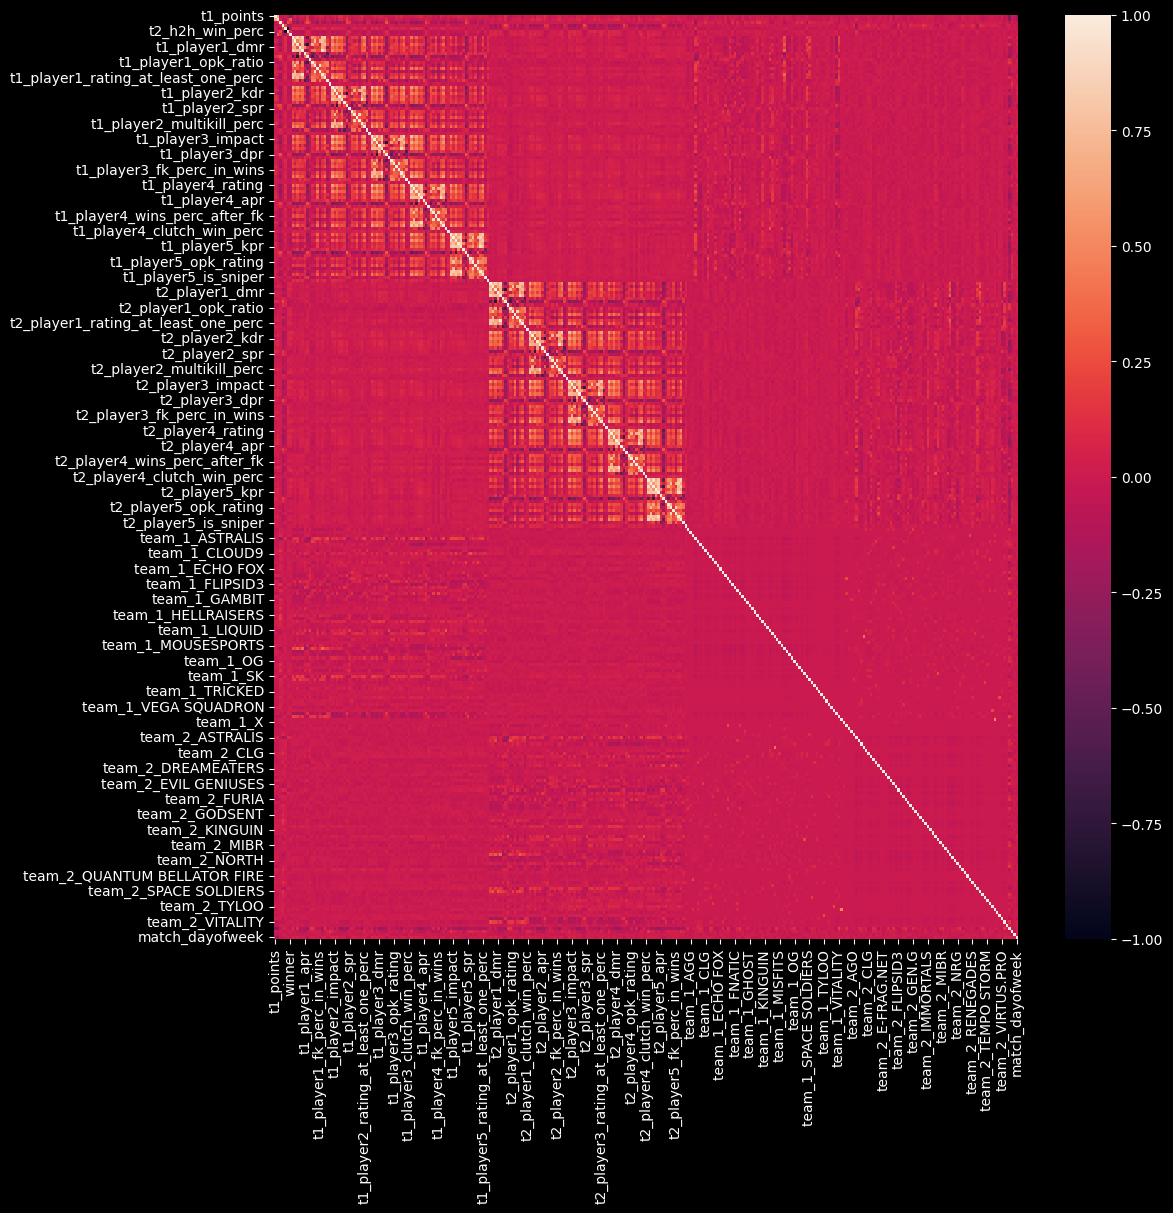

In [19]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr())
plt.show()

**Оставим только значения корреляции > 0.1**

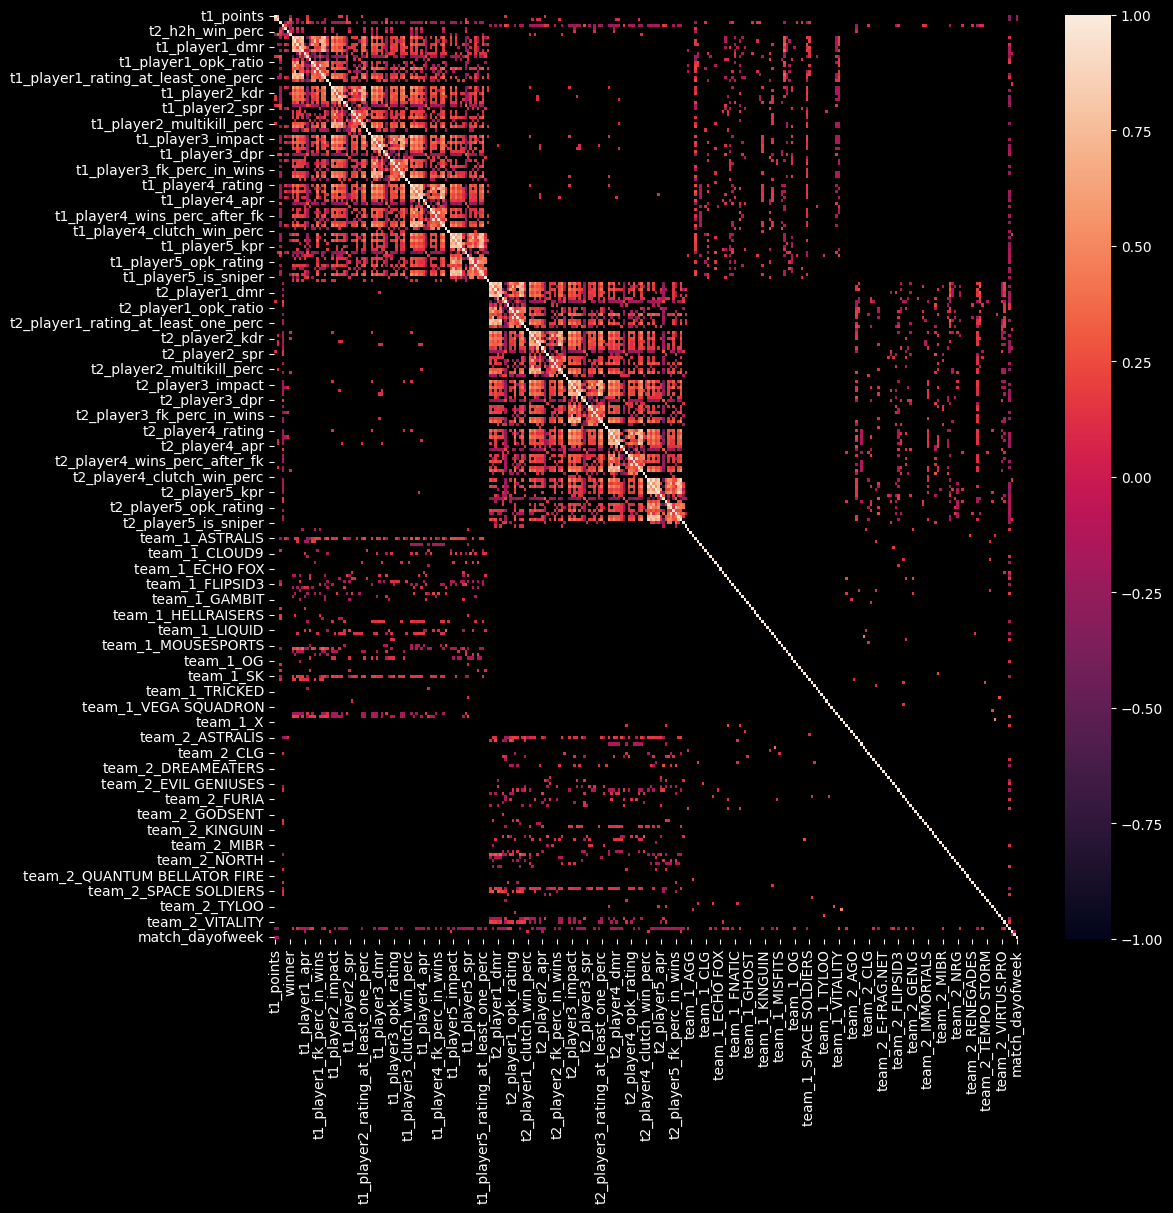

In [20]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr()[np.abs(df.corr()) > 0.1])
plt.show()

Параметры команды хорощшо коррелируют между собой, но слабо коррелируют с параметрами команты противника

**Выбор целевой переменной**

Так как все параметры в датасете - метрики, вычесленные по итогам матча, то и предсказывать что-то, по типу победы/поражения не имеет смысла

(Так там еще и счет указан)

Поэтому научим нейросеть выставлять команде "оценку"

Для этого создадим еще столбец, отражающий средневзвешенный рейтинг команды с учетом вклада игроков

In [21]:
def calculate_weighted_rating(row, team_prefix):
    ratings = [row[f'{team_prefix}_player{i}_rating'] for i in range(1, 6)]
    impacts = [row[f'{team_prefix}_player{i}_impact'] for i in range(1, 6)]
    
    weights = []
    for i in range(5):
        weight = impacts[i]
        weights.append(weight)

    total_weight = sum(weights)
    if total_weight > 0:
        normalized_weights = [w/total_weight for w in weights]
    else:
        normalized_weights = [0.2] * 5
    
    weighted_rating = sum(r * w for r, w in zip(ratings, normalized_weights))
    
    return weighted_rating

In [22]:
df['t1_weighted_rating'] = df.apply(lambda x: calculate_weighted_rating(x, 't1'), axis=1)
df['t2_weighted_rating'] = df.apply(lambda x: calculate_weighted_rating(x, 't2'), axis=1)

In [23]:
df.drop([f't1_player{i}_rating' for i in range(1, 6)], axis=1, inplace=True)
df.drop([f't1_player{i}_impact' for i in range(1, 6)], axis=1, inplace=True)

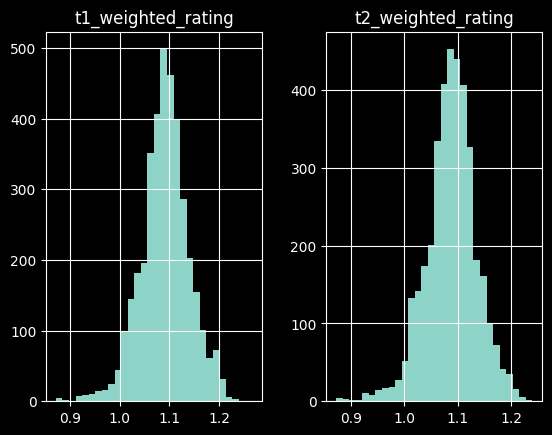

In [25]:
df[['t1_weighted_rating', 't2_weighted_rating']].hist(bins=30)
plt.show()

In [26]:
# Стандартизуем данные, так как есть выбросы
df = (df - df.mean()) / df.std()

In [27]:
target_col = 't1_weighted_rating'

In [28]:
for col in df.columns:
    print(f'corr for {col} column: {np.abs(df[target_col].corr(df[col]))}')

corr for t1_points column: 0.022138884674942298
corr for t2_points column: 0.08357331972573756
corr for t1_world_rank column: 0.28092916591755107
corr for t2_world_rank column: 0.00018857630110014794
corr for t1_h2h_win_perc column: 0.14050017095530756
corr for t2_h2h_win_perc column: 0.1405001709553076
corr for winner column: 0.12270058796504915
corr for t1_player1_kdr column: 0.6821167815053483
corr for t1_player1_dmr column: 0.44426597541736446
corr for t1_player1_kpr column: 0.5670014153106571
corr for t1_player1_apr column: 0.08792921510375279
corr for t1_player1_dpr column: 0.5090214618089781
corr for t1_player1_spr column: 0.005720936347032552
corr for t1_player1_opk_ratio column: 0.37326162455095113
corr for t1_player1_opk_rating column: 0.2979204799776152
corr for t1_player1_wins_perc_after_fk column: 0.4820452054413401
corr for t1_player1_fk_perc_in_wins column: 0.08951579317828669
corr for t1_player1_multikill_perc column: 0.5079284055168084
corr for t1_player1_rating_at_lea

Есть много слабо коррелирующих фич

In [29]:
features = []

for col in df.columns:
    if np.abs(df[target_col].corr(df[col])) > 0.15:
        features.append(col)

features

['t1_world_rank',
 't1_player1_kdr',
 't1_player1_dmr',
 't1_player1_kpr',
 't1_player1_dpr',
 't1_player1_opk_ratio',
 't1_player1_opk_rating',
 't1_player1_wins_perc_after_fk',
 't1_player1_multikill_perc',
 't1_player1_rating_at_least_one_perc',
 't1_player2_kdr',
 't1_player2_dmr',
 't1_player2_kpr',
 't1_player2_apr',
 't1_player2_dpr',
 't1_player2_opk_ratio',
 't1_player2_opk_rating',
 't1_player2_wins_perc_after_fk',
 't1_player2_multikill_perc',
 't1_player2_rating_at_least_one_perc',
 't1_player3_kdr',
 't1_player3_dmr',
 't1_player3_kpr',
 't1_player3_dpr',
 't1_player3_opk_ratio',
 't1_player3_opk_rating',
 't1_player3_wins_perc_after_fk',
 't1_player3_multikill_perc',
 't1_player3_rating_at_least_one_perc',
 't1_player4_kdr',
 't1_player4_dmr',
 't1_player4_kpr',
 't1_player4_dpr',
 't1_player4_opk_ratio',
 't1_player4_opk_rating',
 't1_player4_wins_perc_after_fk',
 't1_player4_multikill_perc',
 't1_player4_rating_at_least_one_perc',
 't1_player5_kdr',
 't1_player5_dmr',
 

In [30]:
df_new = df[features]
df_new.shape

(3787, 52)

In [31]:
X, Y = df_new.drop(target_col, axis=1), df_new[target_col]
X, Y = X.values, Y.values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_temp, y_train, y_temp = train_test_split(
    X, Y, 
    test_size=0.3,  
    random_state=42
)


x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp,
    test_size=0.5,
    random_state=42
)

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense
from tensorflow.keras.models import Sequential
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import numpy as np
from scipy.linalg import pinv

In [62]:
# ООП на питоне
class RBFLayer(Layer):
    def __init__(self, num_centers, rbf_type='gaussian', init_method='kmeans', **kwargs):

        super(RBFLayer, self).__init__(**kwargs)

        self.num_centers = num_centers
        self.rbf_type = rbf_type
        self.init_method = init_method
    
    def build(self, input_shape):
        # инициализация центров
        if self.init_method == 'kmeans':
            kmeans = KMeans(n_clusters=self.num_centers, random_state=42)
            kmeans.fit(x_train)
            initial_centers = kmeans.cluster_centers_
        else:  
            idx = np.random.choice(x_train.shape[0], self.num_centers, replace=False)
            initial_centers = x_train[idx]
        
        self.centers = self.add_weight(
            name='centers',
            shape=(self.num_centers, input_shape[-1]),
            initializer=tf.constant_initializer(initial_centers),
            trainable=False
        )
        
        # инициализация ширины
        distances = initial_centers[:, np.newaxis] 
        distances = distances - initial_centers
        distances = distances ** 2
        distances = distances.sum(axis=2)
        distances = np.sqrt(distances)

        avg_distances = np.mean(distances, axis=1)
        initial_sigmas = avg_distances / np.sqrt(2 * self.num_centers)
        
        self.sigmas = self.add_weight(
            name='sigmas',
            shape=(self.num_centers,),
            initializer=tf.constant_initializer(initial_sigmas),
            trainable=True
        )
        
        super().build(input_shape)
    
    def call(self, inputs):
        diff = tf.expand_dims(inputs, 1) - tf.expand_dims(self.centers, 0)
        distances = tf.reduce_sum(tf.square(diff), axis=-1)
        
        if self.rbf_type == 'gaussian':
            return tf.exp(-distances / (2 * tf.square(self.sigmas) + 1e-10))
        elif self.rbf_type == 'multiquadric':
            return tf.sqrt(distances + tf.square(self.sigmas))
        elif self.rbf_type == 'inverse_quadratic':
            return 1.0 / (tf.sqrt(distances) + tf.square(self.sigmas) + 1e-10)
        else:
            raise ValueError("Нет такого")

In [63]:
def create_rbf_model(num_centers=20, rbf_type='gaussian', init_method='kmeans'):
    model = Sequential([
        RBFLayer(num_centers, rbf_type=rbf_type, init_method=init_method),
        Dense(1, activation='sigmoid')
    ])
    return model

In [57]:
import time

In [64]:
def train_pseudo_inverse(model, X, y):  # регрессия
    start_time = time.time()

    rbf_model = Sequential([model.layers[0]])
    rbf_features = rbf_model.predict(X, verbose=0)

    y_reshaped = y.values.reshape(-1, 1) if isinstance(y, pd.Series) else y.reshape(-1, 1)
    W = pinv(rbf_features) @ y_reshaped
    
    output_layer = model.layers[1]
    output_layer.build((None, model.layers[0].num_centers))
    
    output_layer.set_weights([W, np.array([0.0])])

    model.layers[0].trainable = False

    return time.time() - start_time


def train_gradient_descent(model, X, y, epochs=50, lr=0.01, batch_size=32):  # мини батч
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='mse',
        metrics=['mae', 'mse']
    )
    start_time = time.time()

    history = model.fit(
        X, y,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
        verbose=0
    )
    return history, time.time() - start_time

In [59]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X, verbose=0)
    return {
        'rmse': root_mean_squared_error(y, y_pred), 
        'mae': mean_absolute_error(y, y_pred), 
        'r2': r2_score(y, y_pred)
    }
    # return {
    #     'accuracy': accuracy_score(y, y_pred),
    #     'precision': precision_score(y, y_pred, average='weighted'),
    #     'recall': recall_score(y, y_pred, average='weighted'),
    #     'f1': f1_score(y, y_pred, average='weighted')
    # }

In [65]:
results = []

for init_method in ['kmeans', 'random']:
    for rbf_type in ['gaussian', 'multiquadric', 'inverse_quadratic']:

        model_pinv = create_rbf_model(rbf_type=rbf_type, init_method=init_method)
        train_time = train_pseudo_inverse(model_pinv, x_train, y_train)
        metrics = evaluate_model(model_pinv, x_val, y_val)
        results.append({
            'init': init_method,
            'rbf': rbf_type,
            'time': train_time,
            'train': 'pseudo_inverse', 
            **metrics
        })
        
        model_gd = create_rbf_model(rbf_type=rbf_type, init_method=init_method)
        history, train_time = train_gradient_descent(model_gd, x_train, y_train)
        metrics = evaluate_model(model_gd, x_val, y_val)
        results.append({
            'init': init_method,
            'rbf': rbf_type, 
            'time': train_time,
            'train': 'gradient_descent', 
            **metrics
        })

results_df = pd.DataFrame(results)
results_df

init                rbf       time             train      rmse  \
0   kmeans           gaussian   0.343473    pseudo_inverse  1.144312   
1   kmeans           gaussian  10.516267  gradient_descent  0.847032   
2   kmeans       multiquadric   0.290715    pseudo_inverse  1.011417   
3   kmeans       multiquadric   9.566997  gradient_descent  1.033172   
4   kmeans  inverse_quadratic   0.301347    pseudo_inverse  1.018668   
5   kmeans  inverse_quadratic   9.502995  gradient_descent  0.864770   
6   random           gaussian   0.283487    pseudo_inverse  1.169034   
7   random           gaussian   9.350415  gradient_descent  0.845922   
8   random       multiquadric   0.271941    pseudo_inverse  1.009129   
9   random       multiquadric   9.146320  gradient_descent  1.033172   
10  random  inverse_quadratic   0.321082    pseudo_inverse  1.031391   
11  random  inverse_quadratic   9.880867  gradient_descent  0.891076   

         mae        r2  
0   0.896912 -0.231250  
1   0.582870  0.325384  
2   0.791700  0.038127  
3   0.789862 -0.003697  
4   0.797617  0.024286  
5   0.605537  0.296833  
6   0.918141 -0.285024  
7   0.581766  0.327151  
8   0.795300  0.042473  
9   0.789862 -0.003697  
10  0.803613 -0.000240  
11  0.636923  0.253402

In [67]:
def print_grouped_metrics(group_by, metrics = ['rmse', 'mae', 'r2']):
    grouped = results_df.groupby(group_by)

    mean_metrics = grouped.mean(numeric_only=True).reset_index()

    plt.figure(figsize=(14, 8))

    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, len(metrics), i)
        
        sns.barplot(data=mean_metrics, x=group_by, y=metric, palette='viridis')
        
        plt.title(f'сравнение {metric}')
        plt.ylabel(metric.upper())

    plt.tight_layout()
    plt.show()

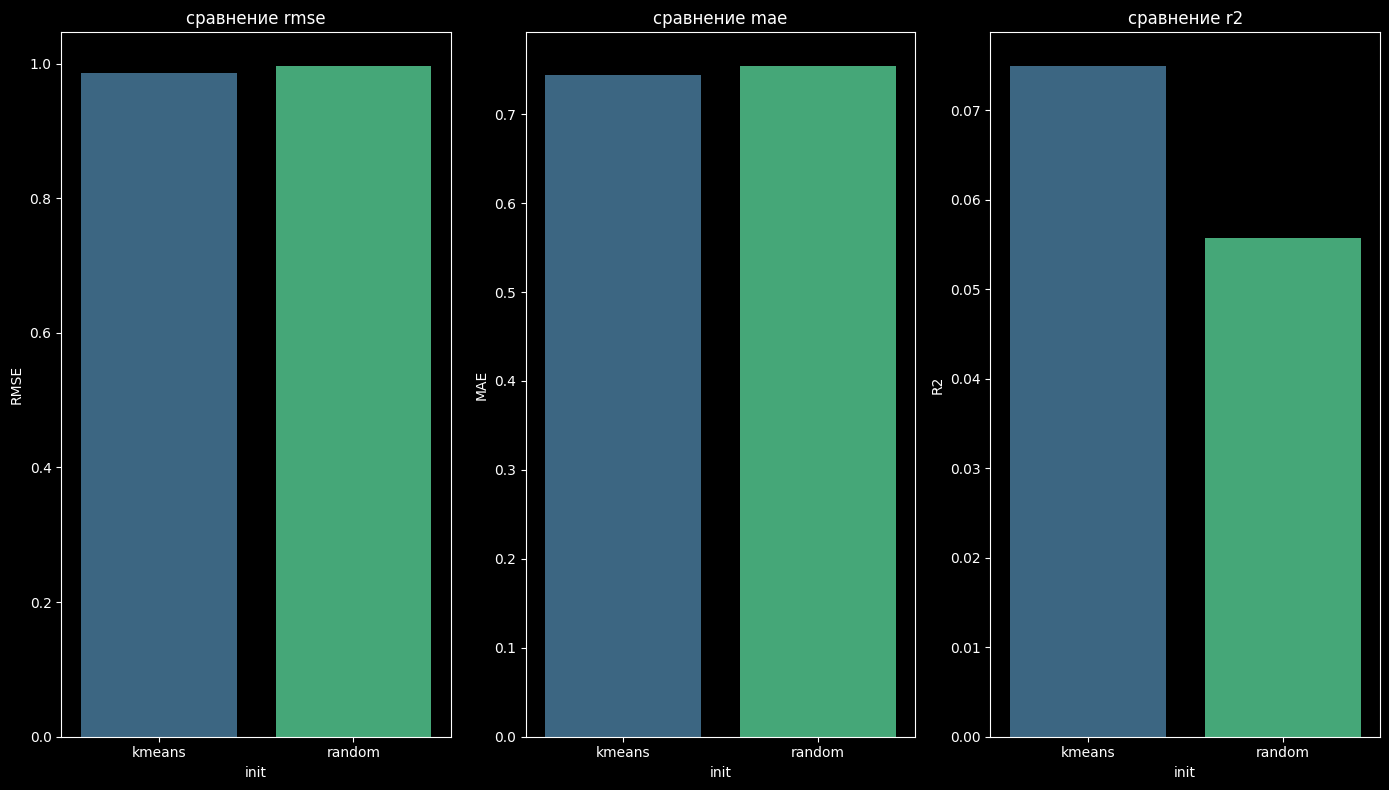

In [68]:
print_grouped_metrics('init')

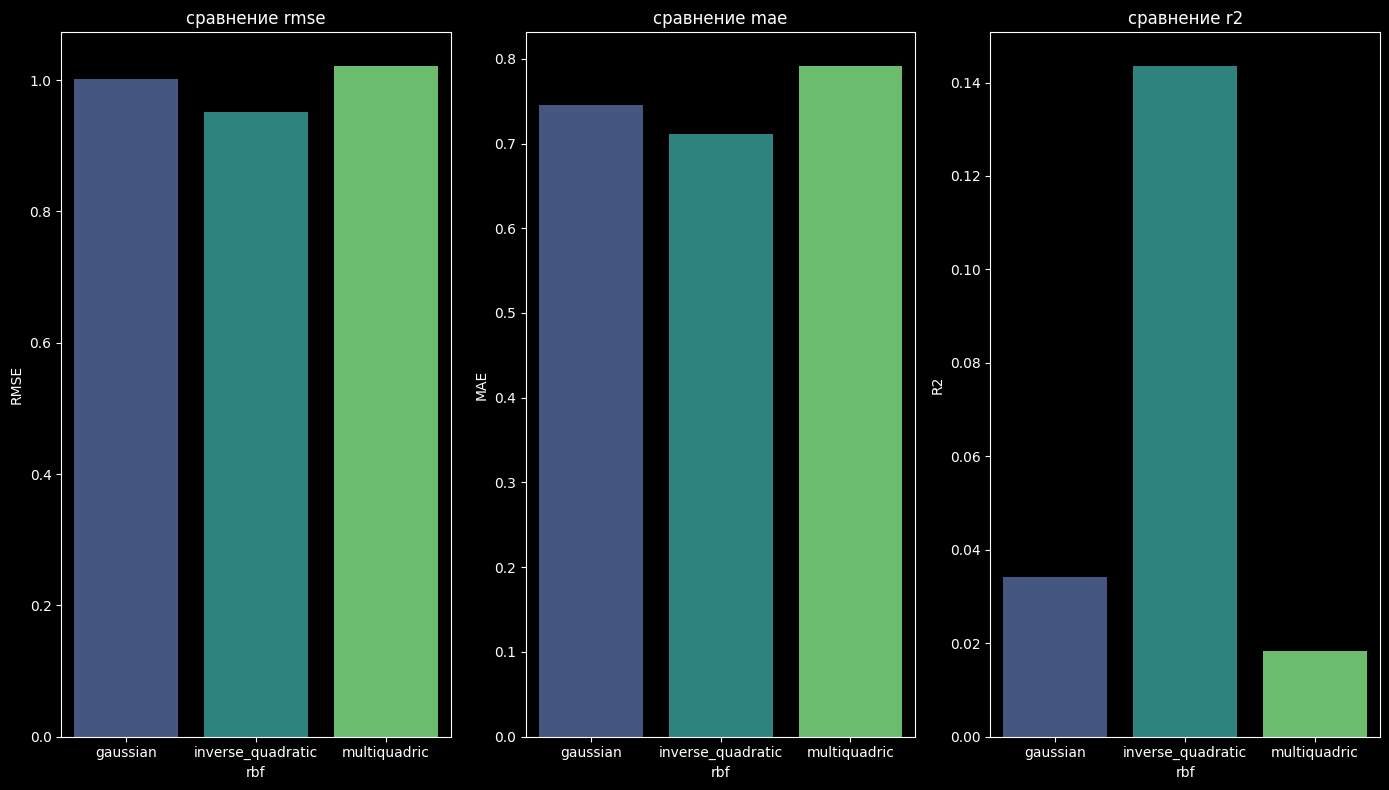

In [69]:
print_grouped_metrics('rbf')

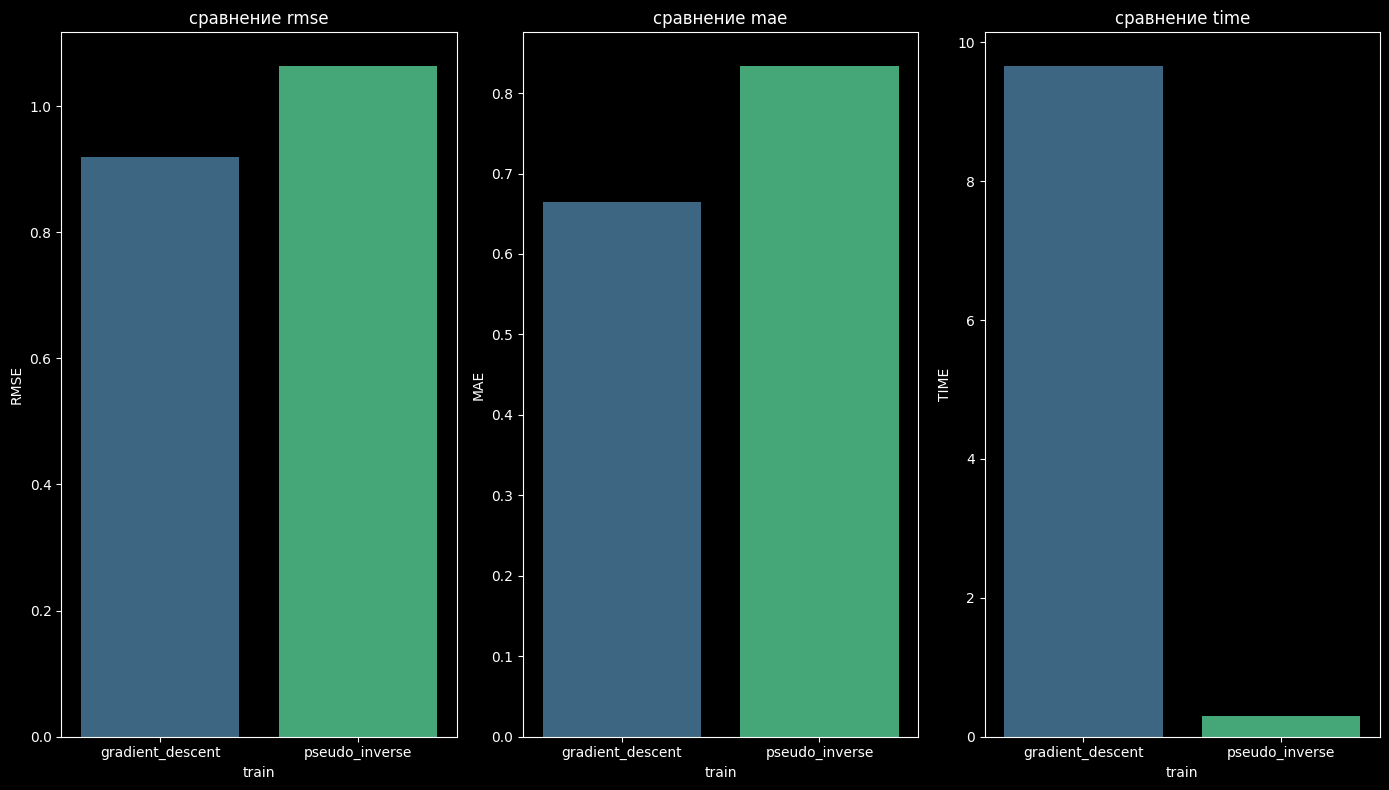

In [70]:
print_grouped_metrics('train', ['rmse', 'mae', 'time'])

**Наилучший результат показывают:**
1. Инициализация с помощью k means
2. inverse multiquadric rbf
3. Обучение градиентным спуском на мини батчах

Однако, стоит отметить, что градиентный спуск для достижения хорошей точности, тредует больше времени на обучение

In [71]:
# Тестирование лучшей модели на тестовых данных
best_model = create_rbf_model(rbf_type='inverse_quadratic', init_method='kmeans')
train_gradient_descent(best_model, x_train, y_train, epochs=50)
test_metrics = evaluate_model(best_model, x_test, y_test)

In [73]:
print("Результаты на тестовых данных:")
print(pd.Series(test_metrics))

Результаты на тестовых данных:
rmse    0.738905
mae     0.519365
r2      0.413444
dtype: float64


# 3. Проклятие размерности

In [87]:
feature_counts = list(range(5, 151, 5))
results = {'n': [], 'rmse': [], 'r2': [], 'mae': [], 'time': []}

for n_features in feature_counts:
    print(n_features, end=' ')

    feature = np.random.choice(df.columns[:-1], size=n_features, replace=False)
    X = df[list(feature)].values
    
    x_train, x_temp, y_train, y_temp = train_test_split(
        X, Y, 
        test_size=0.3,  
        random_state=42
    )

    x_val, x_test, y_val, y_test = train_test_split(
        x_temp, y_temp,
        test_size=0.5,
        random_state=42
    )
    
    model = create_rbf_model(num_centers=20, rbf_type='multiquadric', init_method='kmeans')
    train_time = train_pseudo_inverse(model, x_train, y_train)

    metrics = evaluate_model(model, x_val, y_val)
    
    results['n'].append(n_features)
    results['time'].append(train_time)
    results['rmse'].append(metrics['rmse'])
    results['mae'].append(metrics['mae'])
    results['r2'].append(metrics['r2'])

5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 105 110 115 120 125 130 135 140 145 150 

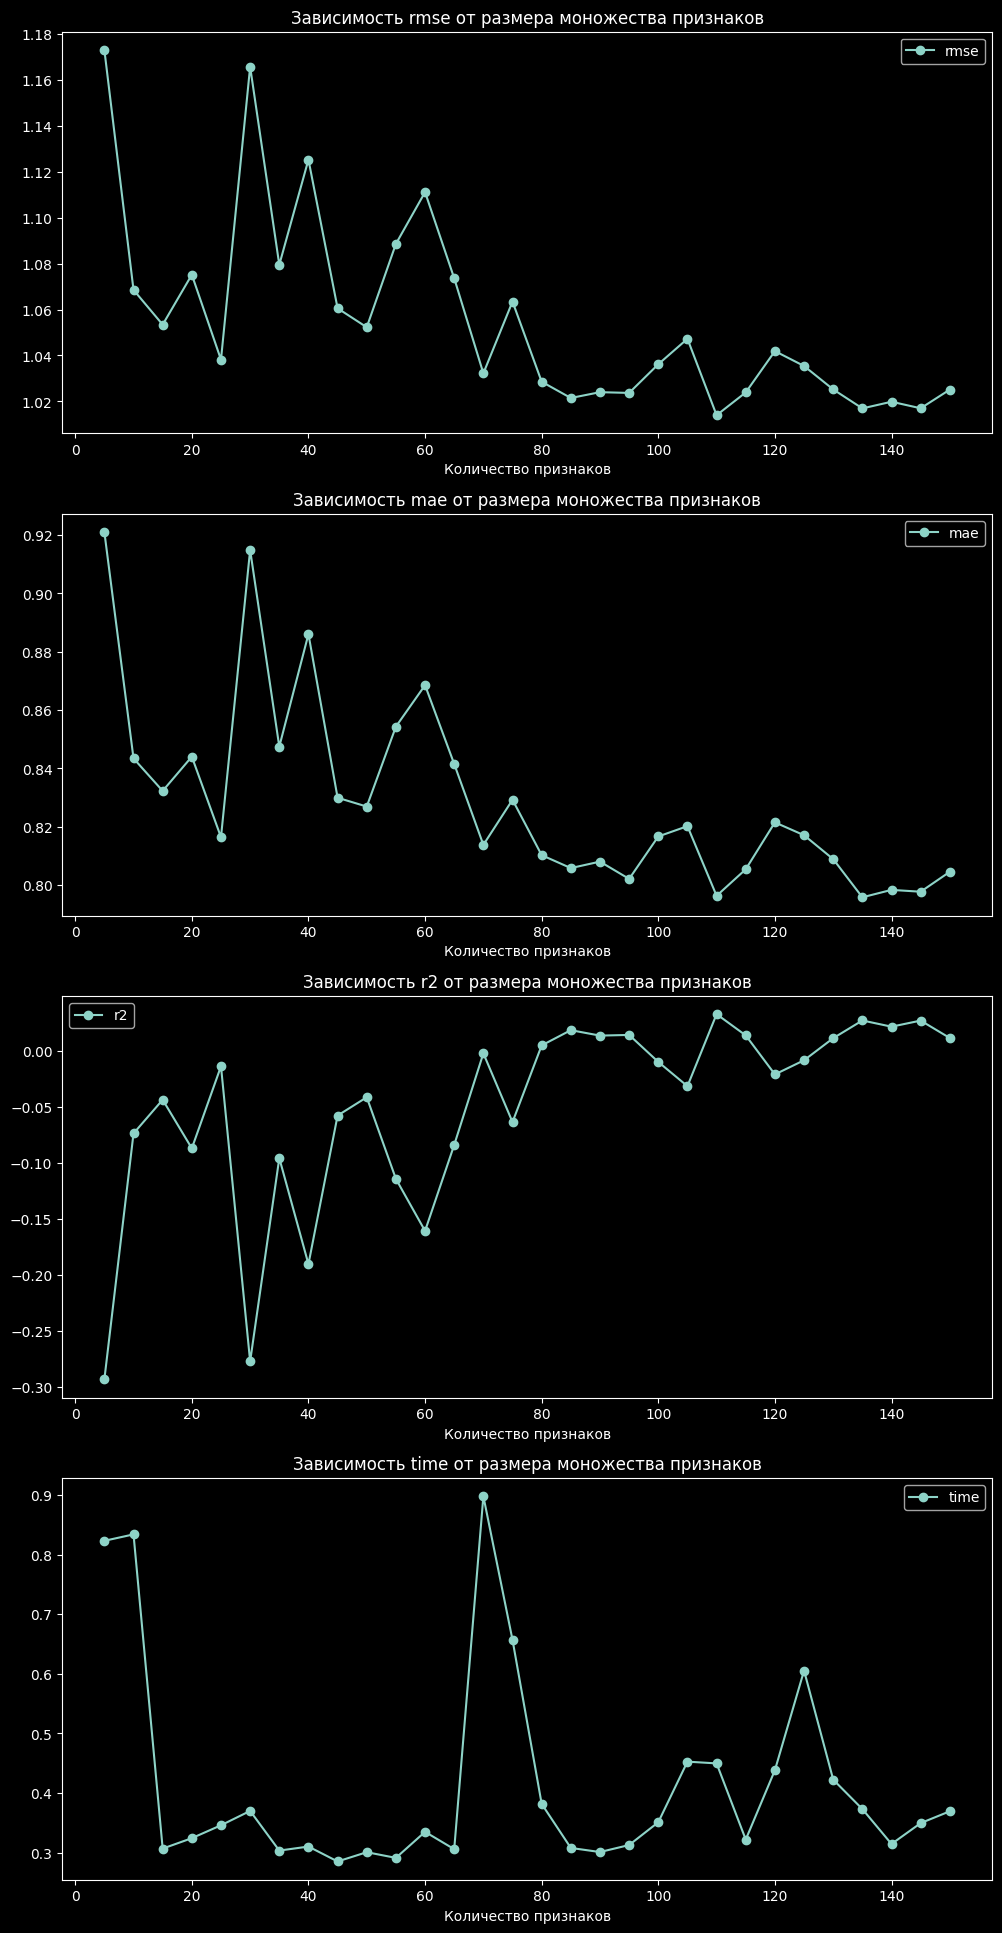

In [88]:
plt.figure(figsize=(12, 24))

for _, name in enumerate(['rmse', 'mae', 'r2', 'time']):
    plt.subplot(4, 1, _ + 1)

    plt.title(f'Зависимость {name} от размера моножества признаков')

    plt.plot(results['n'], results[name], label=name, marker='o')

    plt.xlabel('Количество признаков')

    plt.legend()

plt.show()

In [89]:
nums_centers = list(range(5, 151, 5))
results = {'n': [], 'rmse': [], 'r2': [], 'mae': [], 'time': []}

X = df_new.values
    
x_train, x_temp, y_train, y_temp = train_test_split(
    X, Y, 
    test_size=0.3,  
    random_state=42
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp,
    test_size=0.5,
    random_state=42
)

for num_centers in nums_centers:
    print(num_centers, end=' ')

    model = create_rbf_model(num_centers=num_centers, rbf_type='multiquadric', init_method='kmeans')
    train_time = train_pseudo_inverse(model, x_train, y_train)

    metrics = evaluate_model(model, x_val, y_val)
    
    results['n'].append(num_centers)
    results['time'].append(train_time)
    results['rmse'].append(metrics['rmse'])
    results['mae'].append(metrics['mae'])
    results['r2'].append(metrics['r2'])

5 

10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 105 110 115 120 125 130 135 140 145 150 

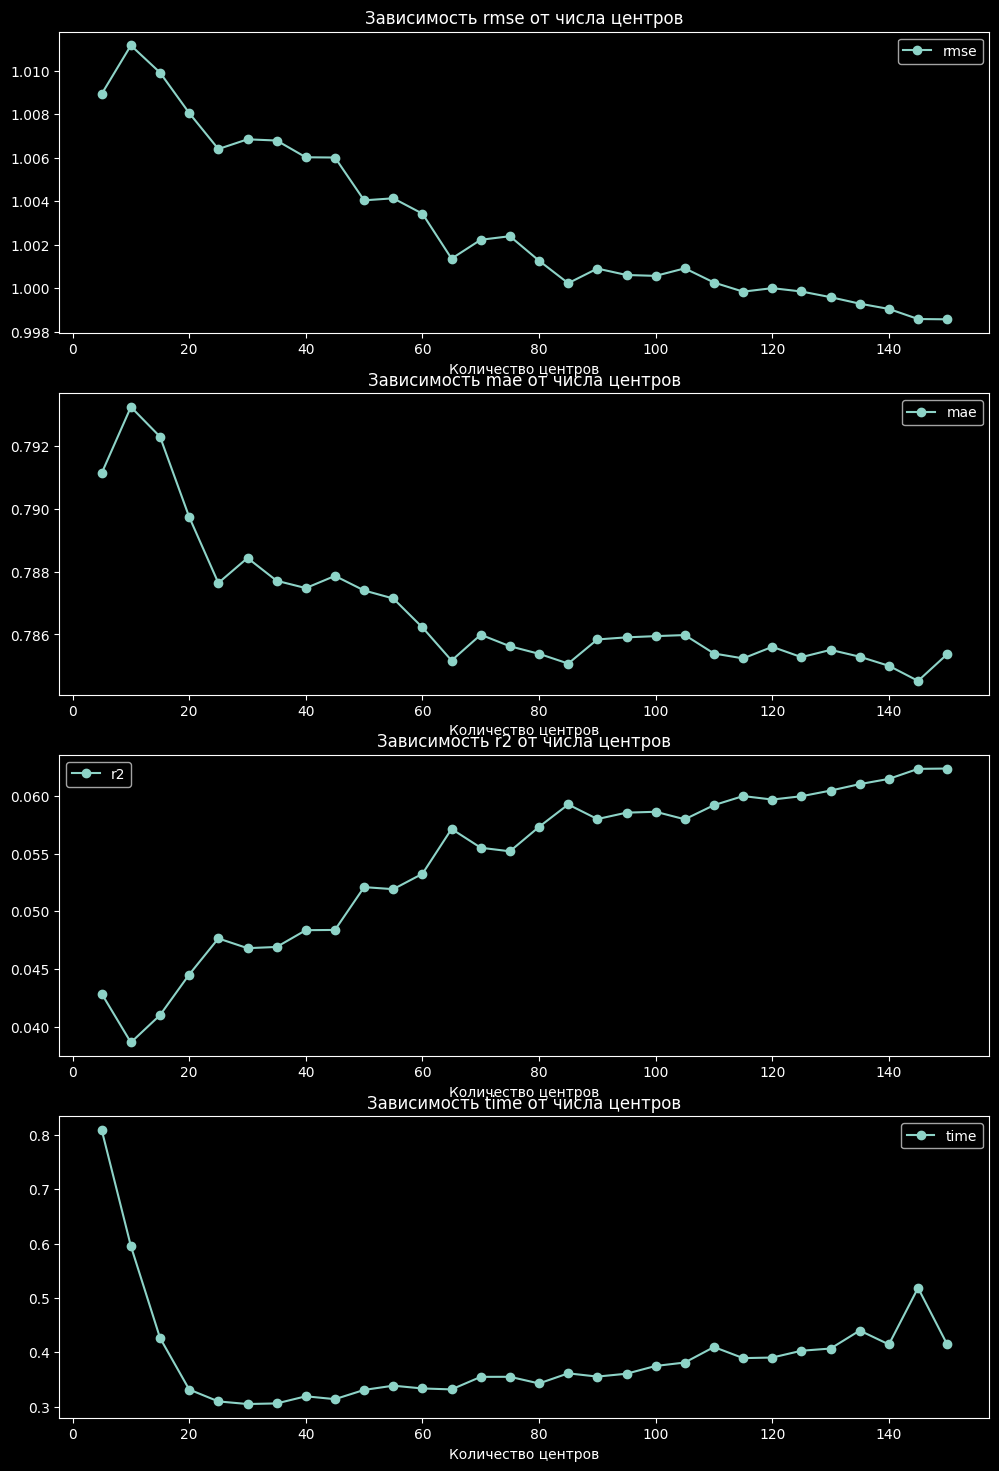

In [90]:
plt.figure(figsize=(12, 18))

for _, name in enumerate(['rmse', 'mae', 'r2', 'time']):
    plt.subplot(4, 1, _ + 1)

    plt.title(f'Зависимость {name} от числа центров')

    plt.plot(results['n'], results[name], label=name, marker='o')

    plt.xlabel('Количество центров')

    plt.legend()

plt.show()

Проклятия размерности не наблюдаю

Возможно, что для данной задачи хватает данных даже для столь большого колличества признаков

Так же, причиной может быть сильная корреляция целевой с фичами

In [91]:
df.shape

(3787, 293)

# 4. Оптимизация модели

**Гибридная модель**

In [92]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [ ]:
def create_hybrid_model(num_centers=50, rbf_type='multiquadric', 
                       mlp_layers=[64, 32], activation='relu', 
                       l2_reg=0.001):

    inputs = Input(shape=(x_train.shape[1],))
    
    rbf_layer = RBFLayer(num_centers, rbf_type=rbf_type, init_method='kmeans')(inputs)

    direct_features = Dense(x_train.shape[1], activation='linear')(inputs)
    
    x = Concatenate()([rbf_layer, direct_features])

    for units in mlp_layers:
        x = Dense(units, activation=activation, 
                 kernel_regularizer=l2(l2_reg))(x)
    
    outputs = Dense(1)(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [94]:
hybrid_model = create_hybrid_model(
    num_centers=30,
    mlp_layers=[128, 64, 32],
    activation='swish',
    l2_reg=0.01
)

hybrid_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

In [95]:
history = hybrid_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=64,
    verbose=1
)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.5356 - mae: 0.4467 - val_loss: 1.8054 - val_mae: 0.1917
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6882 - mae: 0.1838 - val_loss: 1.3834 - val_mae: 0.1577
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3011 - mae: 0.1542 - val_loss: 1.1139 - val_mae: 0.1826
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0514 - mae: 0.1469 - val_loss: 0.9317 - val_mae: 0.1846
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8817 - mae: 0.1418 - val_loss: 0.7813 - val_mae: 0.1107
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7615 - mae: 0.1288 - val_loss: 0.6869 - val_mae: 0.1007
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6658 - mae: 0.1016 - val_loss: 0.6262 - val_mae: 0.1299
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5998 - mae: 0.0977 - val_loss: 0.5539 - val_mae: 0.0722
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.54

In [96]:
rmse = root_mean_squared_error(hybrid_model.predict(x_test), y_test)
r2 = r2_score(hybrid_model.predict(x_test), y_test)
print(f'RMSE: {rmse:.4f}, R2: {r2}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE: 0.0180, R2: 0.9996486337556202


Комбинированная модель кратно лучше

**mini-batch k-means**

In [ ]:
from sklearn.cluster import MiniBatchKMeans

class MiniBatchRBFLayer(RBFLayer):
    def build(self, input_shape):
        kmeans = MiniBatchKMeans(n_clusters=self.num_centers, 
                                random_state=42,
                                batch_size=1024)
        kmeans.fit(x_train)
        initial_centers = kmeans.cluster_centers_
        
        self.centers = self.add_weight(
            name='centers',
            shape=(self.num_centers, input_shape[-1]),
            initializer=tf.constant_initializer(initial_centers),
            trainable=False
        )
        
        distances = initial_centers[:, np.newaxis] 
        distances = distances - initial_centers
        distances = distances ** 2
        distances = distances.sum(axis=2)
        distances = np.sqrt(distances)
        
        avg_distances = np.mean(distances, axis=1)
        initial_sigmas = avg_distances / np.sqrt(2*self.num_centers)
        
        self.sigmas = self.add_weight(
            name='sigmas',
            shape=(self.num_centers,),
            initializer=tf.constant_initializer(initial_sigmas),
            trainable=True
        )

**KD-деревья**

In [100]:
class KDRBFLayer(Layer):
    def __init__(self, num_centers, **kwargs):
        super(KDRBFLayer, self).__init__(**kwargs)
        self.num_centers = num_centers
        
    def build(self, input_shape):
        kmeans = KMeans(n_clusters=self.num_centers, random_state=42)
        kmeans.fit(x_train.numpy() if tf.is_tensor(x_train) else x_train)
        self.centers = self.add_weight(
            name='centers',
            shape=(self.num_centers, input_shape[-1]),
            initializer=tf.constant_initializer(kmeans.cluster_centers_),
            trainable=False
        )
        
        distances = kmeans.cluster_centers_[:, np.newaxis] 
        distances = distances - kmeans.cluster_centers_
        distances = distances ** 2
        distances = distances.sum(axis=2)
        distances = np.sqrt(distances)

        avg_distances = np.mean(distances, axis=1)
        self.sigmas = self.add_weight(
            name='sigmas',
            shape=(self.num_centers,),
            initializer=tf.constant_initializer(avg_distances / np.sqrt(2*self.num_centers)),
            trainable=True
        )
    
    def call(self, inputs):
        diff = tf.expand_dims(inputs, 1) - tf.expand_dims(self.centers, 0)
        squared_dist = tf.reduce_sum(tf.square(diff), axis=-1)
        
        _, indices = tf.math.top_k(-squared_dist, k=min(5, self.num_centers))

        batch_size = tf.shape(inputs)[0]
        rows = tf.repeat(tf.range(batch_size), min(5, self.num_centers))
        cols = tf.reshape(indices, [-1])
        updates = tf.ones(tf.shape(rows)[0])
        mask = tf.scatter_nd(
            tf.stack([rows, cols], axis=1),
            updates,
            [batch_size, self.num_centers]
        )

        rbf = tf.exp(-squared_dist / (2 * tf.square(self.sigmas)))
        return rbf * mask

**Рандомизированная SDV**

In [103]:
from sklearn.utils.extmath import randomized_svd

def train_pseudo_inverse_fast(model, X, y, n_components=None, n_oversamples=10):

        rbf_layer = model.layers[0]
        rbf_model = Sequential([rbf_layer])

        rbf_features = rbf_model.predict(X, verbose=0)
        
        if n_components is None:
            n_components = min(rbf_features.shape[1]//2, 100)
            n_components = max(n_components, 1) 

        U, s, Vh = randomized_svd(
            rbf_features,
            n_components=n_components,
            n_oversamples=n_oversamples,
            random_state=42
        )
            
        s_inv = np.zeros_like(s)
        s_inv[s > 1e-10] = 1/s[s > 1e-10]
        W = Vh.T @ np.diag(s_inv) @ U.T @ y.reshape(-1, 1)
        
        if len(model.layers) > 1:
            output_layer = model.layers[1]
            output_layer.build((None, rbf_layer.num_centers))
            output_layer.set_weights([W, np.array([0.0])])
            
        return model

**Сравнение**

In [108]:
x_sample, y_sample = x_train, y_train

def evaluate_method(method_func, method_name):
    start_time = time.time()
    model = method_func(x_sample, y_sample)
    train_time = time.time() - start_time
    
    y_pred = model.predict(x_val, verbose=0)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    return {'Метод': method_name, 'Время': train_time, 'RMSE': rmse, 'MAE': mae, 'R2': r2}


def baseline_train(X, y):
    model = Sequential([RBFLayer(50), Dense(1)])
    train_pseudo_inverse(model, X, y)
    return model

def minibatch_kmean_train(X, y):
    model = Sequential([MiniBatchRBFLayer(50), Dense(1)])
    train_pseudo_inverse(model, X, y)
    return model

def kdtree_train(X, y):
    model = Sequential([KDRBFLayer(50), Dense(1)])
    train_pseudo_inverse(model, X, y)
    return model

def sdv_train(X, y):
    model = Sequential([RBFLayer(50), Dense(1)])
    train_pseudo_inverse_fast(model, X, y)
    return model

methods = [
    (baseline_train, "Базовая RBF"),
    (minibatch_kmean_train, "MiniBatch KMean"),
    (kdtree_train, "KD-Tree"),
    (sdv_train, "SDV ускорение"),
]

results = []
for func, name in methods:
    print(f"Тестируем {name}...")
    results.append(evaluate_method(func, name))

results = pd.DataFrame(results)
results

Тестируем Базовая RBF...
Тестируем MiniBatch KMean...
Тестируем KD-Tree...
Тестируем SDV ускорение...


Метод     Время      RMSE       MAE        R2
0      Базовая RBF  0.667278  0.981290  0.748152  0.094577
1  MiniBatch KMean  0.447719  1.006736  0.755269  0.047011
2          KD-Tree  0.565703  0.981293  0.748157  0.094570
3    SDV ускорение  0.383570  0.983135  0.751493  0.091169

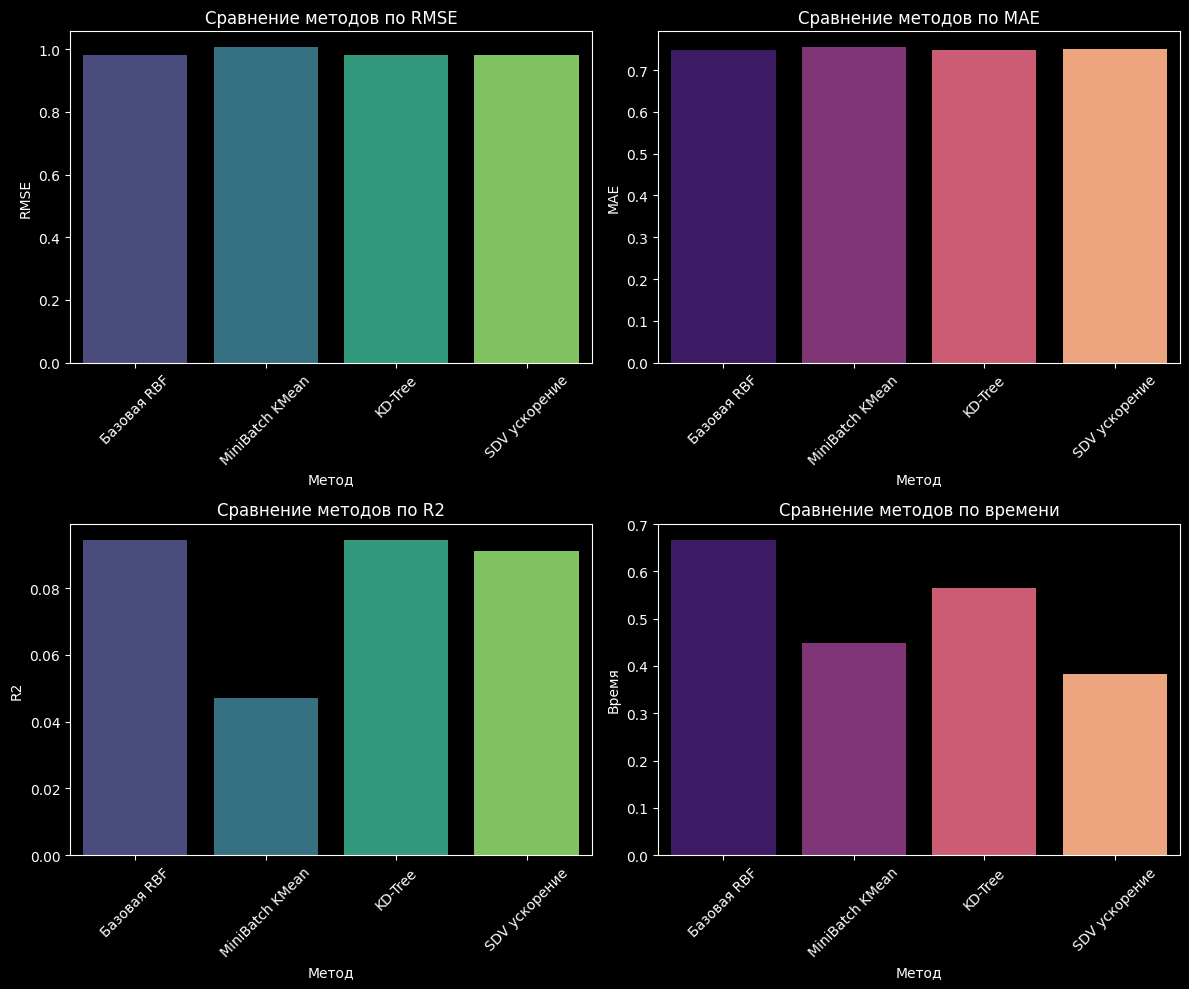

In [110]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.barplot(x=results['Метод'], y=results['RMSE'], palette='viridis')
plt.title('Сравнение методов по RMSE')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

plt.subplot(2, 2, 2)
sns.barplot(x=results['Метод'], y=results['MAE'], palette='magma')
plt.title('Сравнение методов по MAE')
plt.xticks(rotation=45)
plt.ylabel('MAE')

plt.subplot(2, 2, 3)
sns.barplot(x=results['Метод'], y=results['R2'], palette='viridis')
plt.title('Сравнение методов по R2')
plt.xticks(rotation=45)
plt.ylabel('R2')

plt.subplot(2, 2, 4)
sns.barplot(x=results['Метод'], y=results['Время'], palette='magma')
plt.title('Сравнение методов по времени')
plt.xticks(rotation=45)
plt.ylabel('Время')

plt.tight_layout()
plt.show()

Оптимизация позволяет ускорить обучение пожертвовав качеством

**Гиперпараметры**

In [113]:
from sklearn.model_selection import ParameterSampler
from scipy.stats import loguniform, randint, uniform
from tensorflow.keras.layers import Dropout


def create_hybrid_model(num_centers=20, rbf_type='gaussian', init_method='kmeans',
                       mlp_layers=[64, 32], activation='relu', dropout_rate=0.2,
                       l2_reg=0.001, output_units=1, output_activation=None):
    
    inputs = Input(shape=(x_train.shape[1],))
    
    rbf_layer = RBFLayer(num_centers, 
                        rbf_type=rbf_type, 
                        init_method=init_method)(inputs)
    
    direct_path = Dense(x_train.shape[1], 
                       activation='linear',
                       kernel_regularizer=l2(l2_reg))(inputs)
    
    concatenated = Concatenate()([rbf_layer, direct_path])
    
    x = concatenated
    for units in mlp_layers:
        x = Dense(units, 
                 activation=activation,
                 kernel_regularizer=l2(l2_reg))(x)
        x = Dropout(dropout_rate)(x)
    
    outputs = Dense(output_units, activation=output_activation)(x)

    model = Model(inputs=inputs, outputs=outputs)
    
    return model

In [114]:
param_dist = {
    'num_centers': randint(20, 150),
    'rbf_type': ['multiquadric'],
    'mlp_layers': randint(1, 5),
    'units': randint(32, 512),
    'activation': ['relu', 'leaky_relu'],
    'dropout_rate': uniform(0.0, 0.5),
    'l2_reg': loguniform(1e-5, 1e-1),
    'learning_rate': loguniform(1e-4, 1e-2),
    'batch_size': [32]
}

n_iter = 5
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

def train_evaluate_model(params, x_train, y_train, x_val, y_val):
    model = create_hybrid_model(
        num_centers=params['num_centers'],
        rbf_type=params['rbf_type'],
        mlp_layers=[params['units']]*params['mlp_layers'],
        activation=params['activation'],
        dropout_rate=params['dropout_rate'],
        l2_reg=params['l2_reg']
    )
    
    optimizer = Adam(learning_rate=params['learning_rate'])
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=50,
        batch_size=params['batch_size'],
        verbose=0
    )
    
    return {
        'val_loss': history.history['val_loss'][-1],
        'val_mae': history.history['val_mae'][-1],
        'model': model
    }

In [116]:
results = []
for i, params in enumerate(param_list):
    print(f'{i+1} / {n_iter}')

    result = train_evaluate_model(params, x_train, y_train, x_val, y_val)
    results.append({
        **params,
        **result
    })
    
results_df = pd.DataFrame([r for r in results])
best_result = results_df.loc[results_df['val_loss'].idxmin()]

1 / 5
2 / 5
3 / 5
4 / 5
5 / 5


In [119]:
print("лучшие параметры:")
print(best_result[list(param_dist.keys())])

print("\nметрики лучшей модели:")
print(f"mse: {best_result['val_loss']:.4f}")
print(f"mae: {best_result['val_mae']:.4f}")

лучшие параметры:
num_centers               122
rbf_type         multiquadric
mlp_layers                  1
units                     153
activation               relu
dropout_rate         0.398271
l2_reg               0.000054
learning_rate        0.003626
batch_size                 32
Name: 0, dtype: object

метрики лучшей модели:
mse: 0.0276
mae: 0.0963


In [120]:
rbf_metrics = {
    'rmse': root_mean_squared_error(hybrid_model.predict(x_test), y_test), 
    'mae': mean_absolute_error(hybrid_model.predict(x_test), y_test),
    'r2': r2_score(hybrid_model.predict(x_test), y_test)
}

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


# Сравнение с другими моделями

In [121]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'rmse': root_mean_squared_error(y, y_pred), 
        'mae': mean_absolute_error(y, y_pred),
        'r2': r2_score(y, y_pred)
    }

In [122]:
from sklearn.linear_model import LinearRegression


linear = LinearRegression()
linear.fit(x_train, y_train)
linear_metrics = evaluate_model(linear, x_test, y_test)
linear_metrics

{'rmse': 1.2239457843621678e-15, 'mae': 9.61924746310445e-16, 'r2': 1.0}

In [123]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf.fit(x_train, y_train)
rf_metrics = evaluate_model(rf, x_test, y_test)
rf_metrics

{'rmse': 0.009916946757180523,
 'mae': 0.002745410855700815,
 'r2': 0.9998943453530741}

In [124]:
from xgboost import XGBRegressor


xgb = XGBRegressor(
    n_estimators=50,
    max_depth=10,
    learning_rate=0.1,
    random_state=42
)
xgb.fit(x_train, y_train)
xgb_metrics = evaluate_model(xgb, x_test, y_test)
xgb_metrics

{'rmse': 0.01694749736471896,
 'mae': 0.0076941018201933005,
 'r2': 0.9996914370414172}

In [125]:
results = {
    'Linear Regression': linear_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics, 
    'RBF + MLP model': rbf_metrics
}


results = pd.DataFrame(results).T.sort_values('rmse')
results

rmse           mae        r2
Linear Regression  1.223946e-15  9.619247e-16  1.000000
Random Forest      9.916947e-03  2.745411e-03  0.999894
XGBoost            1.694750e-02  7.694102e-03  0.999691
RBF + MLP model    1.799699e-02  1.331045e-02  0.999649

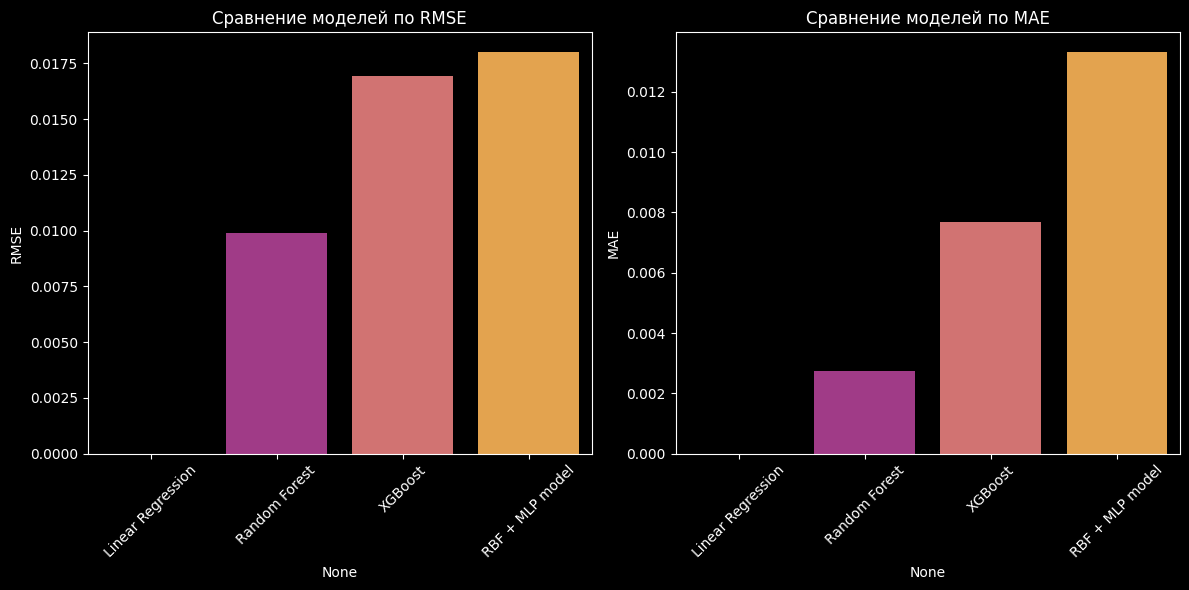

In [128]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=results.index, y=results['rmse'], palette='plasma')
plt.title('Сравнение моделей по RMSE')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
sns.barplot(x=results.index, y=results['mae'], palette='plasma')
plt.title('Сравнение моделей по MAE')
plt.xticks(rotation=45)
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

А вот и корень всех проблем

Целевая переменная имеет выраженную линейную зависимость

Из-за линейности задачи RBF не эффективна

# 6. Анализ результатов

1. Реализован и протестирован класс RBF слой нейронной сети
2. Написан ряд методов оптимизации RBF слоя
3. Исследован вопрос проявления в данной задачи проклятия размерности
4. Обучен ряд моделей для оценки рейтинга команды
5. Проведено сравнение различных моделей для решения задачи

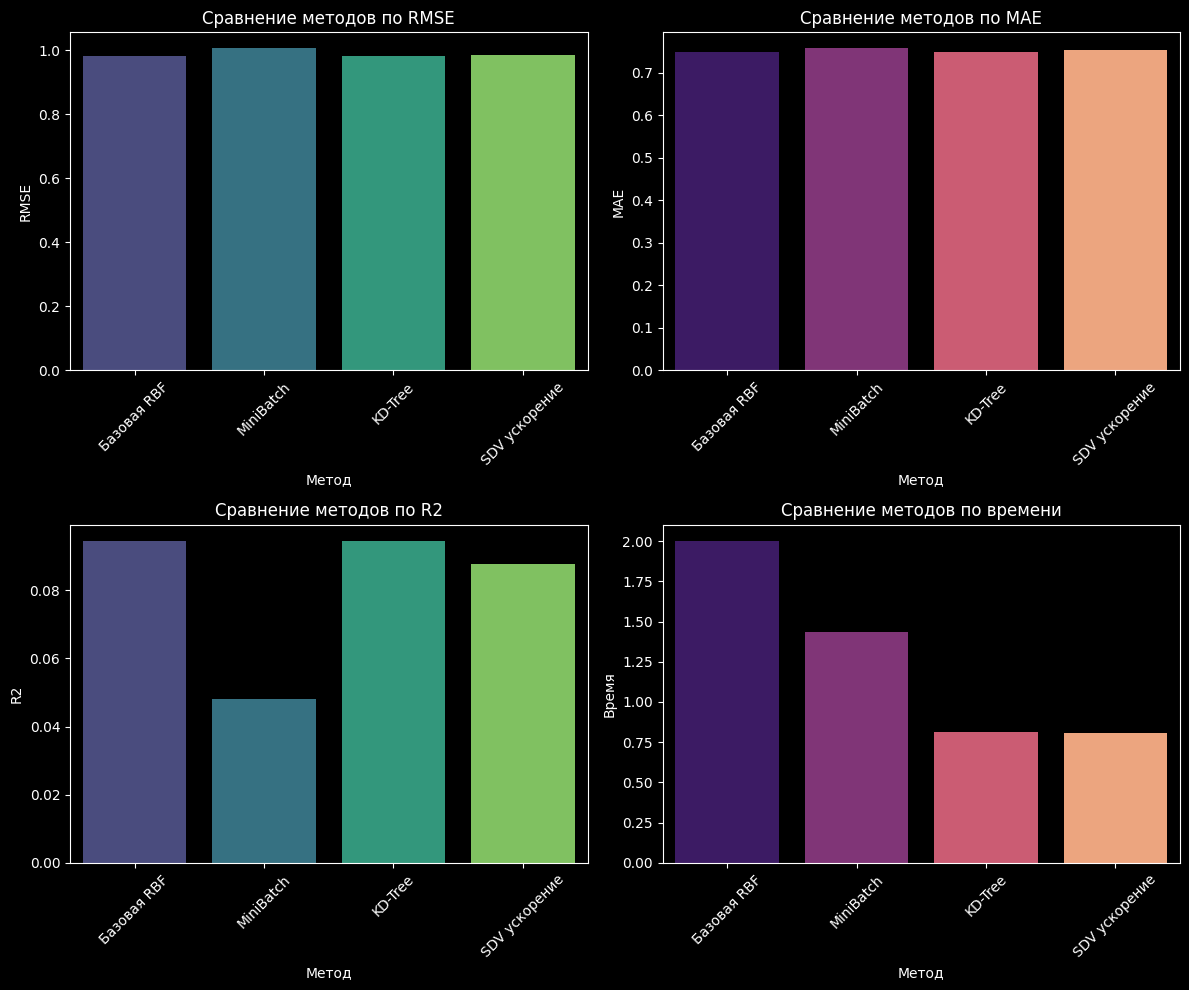

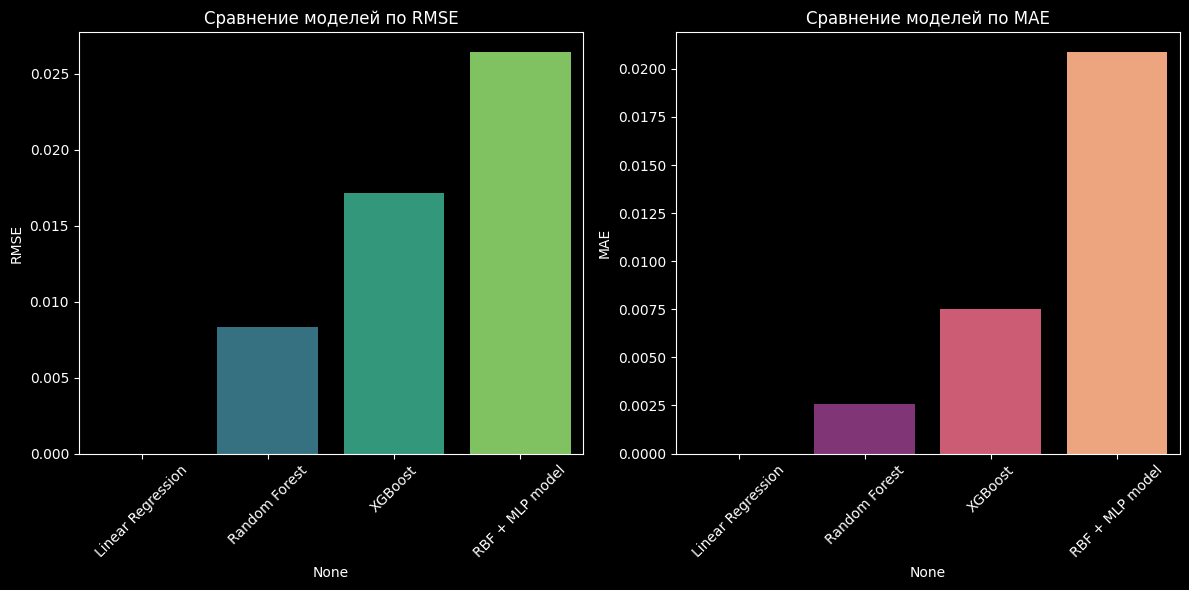

RBF архитектура не подходит для решения данной задачи, так как зависимость целевой переменной с признаками - линейная. 
Поэтому другие более простые модели будут давать сопоставимый(а иногда и более сильный) результат за меньшее время

In [139]:
def create_model(num_centers=51):
    inputs = Input(shape=(x_train.shape[1],))
    rbf_layer = RBFLayer(num_centers)(inputs)
    x = Dense(1)(rbf_layer)
    model = tf.keras.Model(inputs, x)
    return model

model = create_model()
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

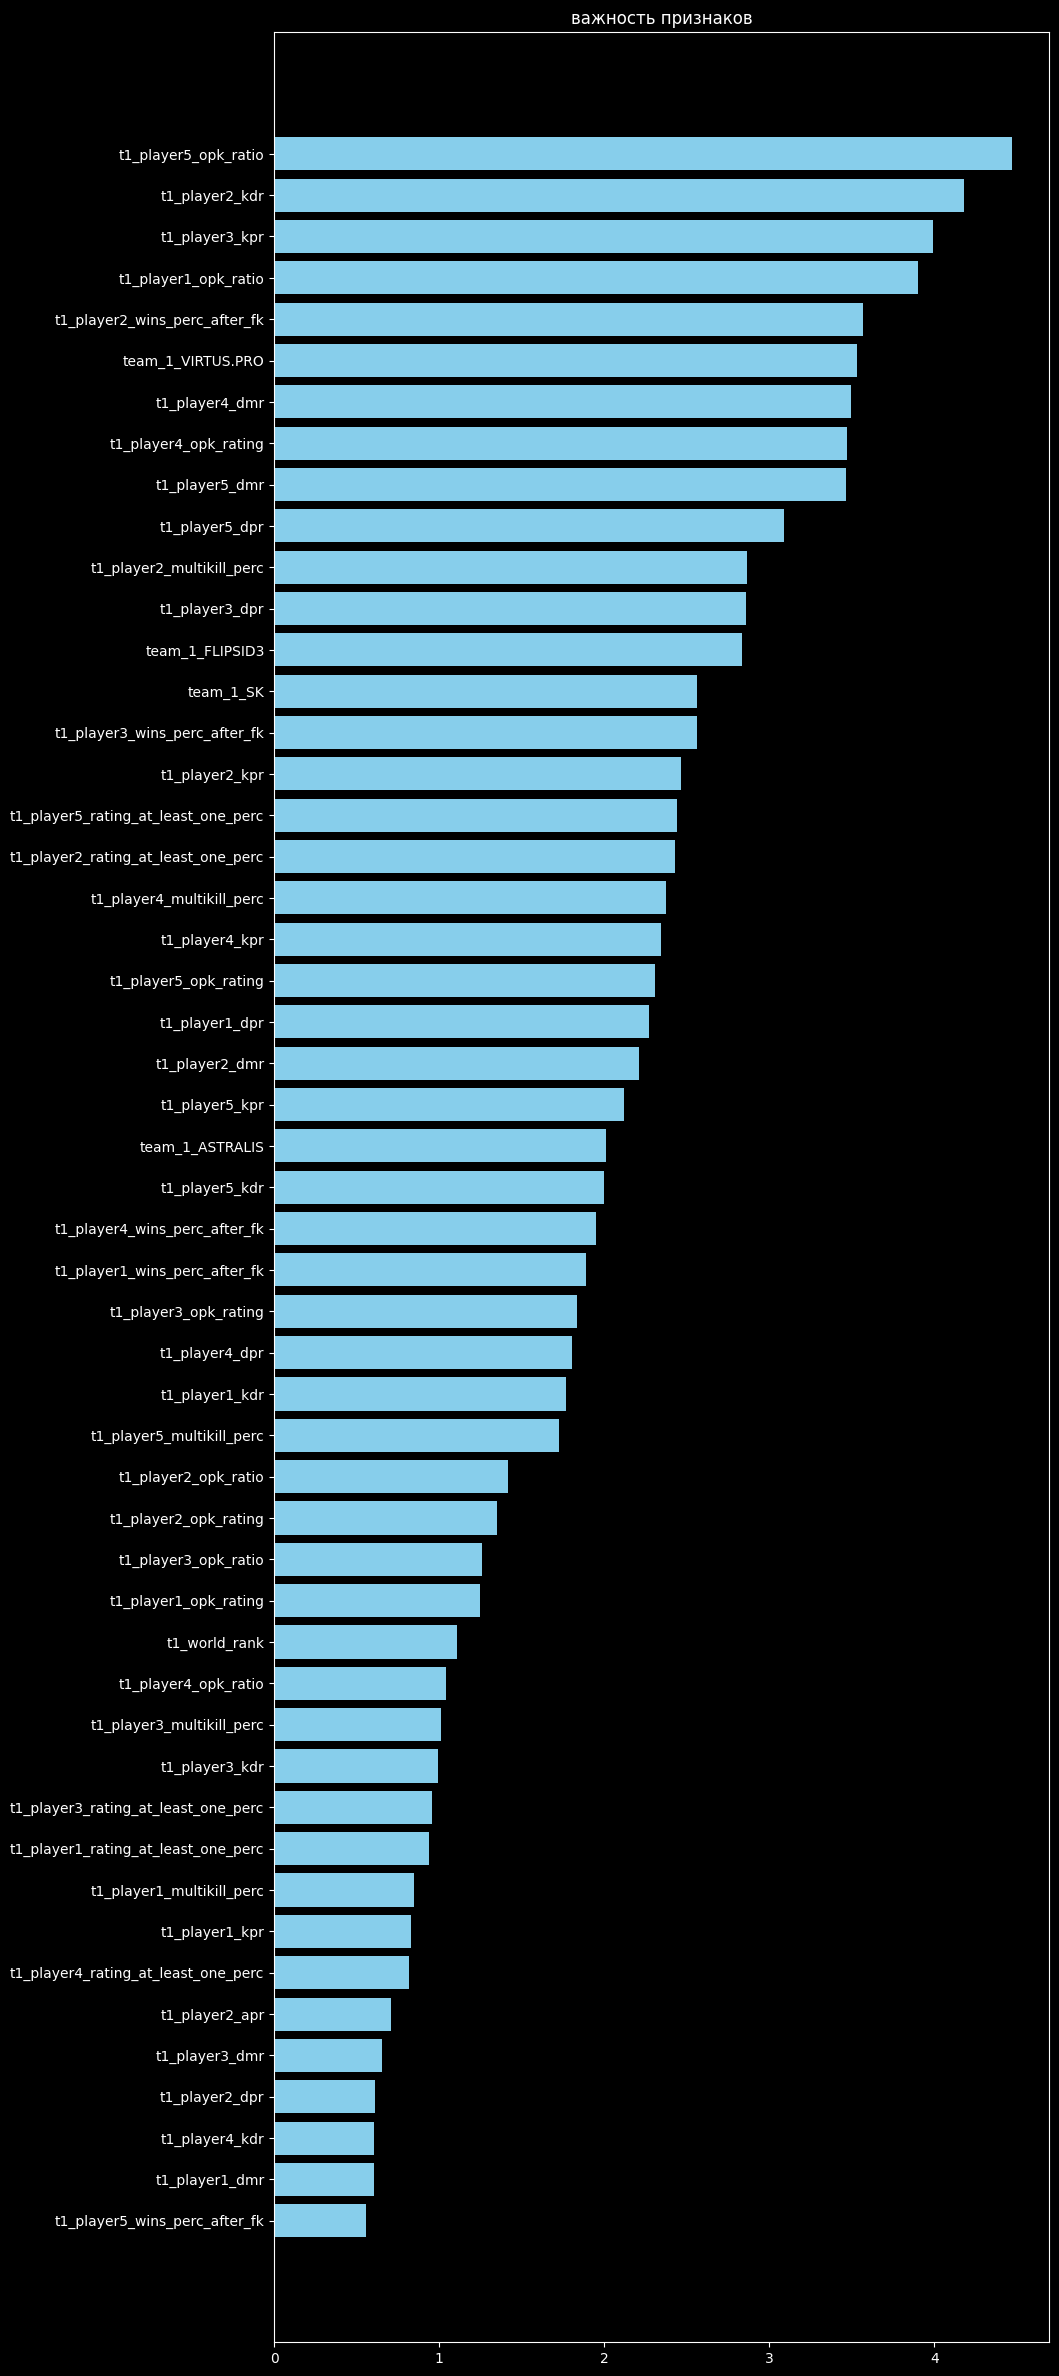

In [143]:
weights = model.layers[1].get_weights()[0]

importance_df = pd.DataFrame({
    'фича': features,
    'важность': np.abs(weights.flatten())
})
importance_df = importance_df.sort_values(by='важность', ascending=False)

plt.figure(figsize=(10, 30))
plt.title('важность признаков')
plt.barh(importance_df['фича'], importance_df['важность'], color='skyblue')
plt.gca().invert_yaxis() 
plt.show()


**Перспективы**
1. Обработать выбросы
2. Расширить датасет добавив строки из датасета, где t1 и t2 метрики поменяны местами

**Применимость датасета**
- Датасет больше подходит для проведения статистического анализа, тестирования гипотез, потроения инфографики
- Сама поставленная задача не слишком предназначена для решения алгоритмами ML, так как для вычисления рейтинга есть четкая формула